In [1]:
import pandas as pd
import os
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df_clicks = pd.read_csv('../data/data_tobii_short.csv')

In [8]:
df_clicks.head()

paths  x_normalized  \
0  /home/newuser/data/0_new_data/P_15/14919337389...      0.400634   
1  /home/newuser/data/0_new_data/P_15/14919337389...      0.402445   
2  /home/newuser/data/0_new_data/P_15/14919337389...      0.403391   
3  /home/newuser/data/0_new_data/P_15/14919337389...      0.401790   
4  /home/newuser/data/0_new_data/P_15/14919337389...      0.401127   

   y_normalized  
0      0.371580  
1      0.382982  
2      0.378205  
3      0.382480  
4      0.379053

In [9]:
df_clicks['full_name'] = df_clicks['paths'].apply(lambda x: '#'.join(x.split('/')[-3:]))

In [10]:
df_clicks.head()

paths  x_normalized  \
0  /home/newuser/data/0_new_data/P_15/14919337389...      0.400634   
1  /home/newuser/data/0_new_data/P_15/14919337389...      0.402445   
2  /home/newuser/data/0_new_data/P_15/14919337389...      0.403391   
3  /home/newuser/data/0_new_data/P_15/14919337389...      0.401790   
4  /home/newuser/data/0_new_data/P_15/14919337389...      0.401127   

   y_normalized                                          full_name  
0      0.371580  P_15#1491933738937_2_-study-dot_test_instructi...  
1      0.382982  P_15#1491933738937_2_-study-dot_test_instructi...  
2      0.378205  P_15#1491933738937_2_-study-dot_test_instructi...  
3      0.382480  P_15#1491933738937_2_-study-dot_test_instructi...  
4      0.379053  P_15#1491933738937_2_-study-dot_test_instructi...

In [14]:
path_save = '../data/tobii_images'

In [15]:
!mkdir $path_save

In [ ]:
for i in tqdm(range(352400, df_clicks.shape[0])):
    row = df_clicks.iloc[i]
    os.system(f'cp {row["paths"]} {os.path.join(path_save, row["full_name"])}')

 33%|████████████████████████▊                                                  | 131301/396469 [08:17<17:52, 247.25it/s]

In [ ]:
152451

In [15]:
!zip -r imgs_click.zip $path_save

  adding: ../data/clicks_images/ (stored 0%)
  adding: ../data/clicks_images/P_42_1492704386359_21_-study-where_to_find_morel_mushrooms_writing_frame24.png (deflated 11%)
  adding: ../data/clicks_images/P_01_1491423217564_3_-study-dot_test_frame268.png (deflated 7%)
  adding: ../data/clicks_images/P_59_1493215711300_9_-study-benefits_of_running_writing_frame3465.png (deflated 9%)
  adding: ../data/clicks_images/P_40_1492693878775_5_-study-fitts_law_frame1271.png (deflated 10%)
  adding: ../data/clicks_images/P_37_1492546151879_3_-study-dot_test_frame356.png (deflated 5%)
  adding: ../data/clicks_images/P_01_1491423217564_24_-study-educational_advantages_of_social_networking_sites_writing_frame30.png (deflated 4%)
  adding: ../data/clicks_images/P_46_1492780566148_3_-study-dot_test_frame660.png (deflated 10%)
  adding: ../data/clicks_images/P_27_1492178671950_3_-study-dot_test_frame319.png (deflated 12%)
  adding: ../data/clicks_images/P_50_1493046335268_17_-study-educational_advantages

In [16]:
!ls

1.db			      best_model.pt		linear_rel3.db
GazeDetectionTrain.ipynb      catboost_info		pupil_detection.py
GazePredictionBaseline.ipynb  facemesh.py		top_features.db
Pupil_Detection.ipynb	      feature_importances.html	top_features1.db
SomeStuff.ipynb		      imgs_click.zip		utils.py
__pycache__		      linear_rel1.db		weights
all_features.db		      linear_rel2.db


### Bad images

In [19]:
bad_df = pd.read_csv('./bad_images.csv', sep = ';')

In [20]:
bad_df.head()

Image_name  looking_down  no_pupils  \
0  P_42_1492704386359_21_-study-where_to_find_mor...             1          1   
1  P_59_1493215711300_9_-study-benefits_of_runnin...             1          1   
2  P_08_1491591937547_15_-study-where_to_find_mor...             1          1   
3  P_13_1491923431229_5_-study-fitts_law_frame112...             0          0   
4  P_31_1492193186132_21_-study-where_to_find_mor...             1          0   

   blink  face_covered  
0      0             0  
1      0             0  
2      1             0  
3      1             0  
4      0             0

In [23]:
bad_df_paths = bad_df.merge(
    df_clicks,
    left_on = 'Image_name',
    right_on = 'full_name',
    how = 'left'
).drop(columns = ['Image_name', 'full_name'])

In [27]:
bad_df_paths.head()

looking_down  no_pupils  blink  face_covered  \
0             1          1      0             0   
1             1          1      0             0   
2             1          1      1             0   
3             0          0      1             0   
4             1          0      0             0   

                                               paths  x_normalized  \
0  /home/newuser/data/0_new_data/P_42/14927043863...      0.261979   
1  /home/newuser/data/0_new_data/P_59/14932157113...      0.503646   
2  /home/newuser/data/0_new_data/P_08/14915919375...      0.422396   
3  /home/newuser/data/0_new_data/P_13/14919234312...      0.425000   
4  /home/newuser/data/0_new_data/P_31/14921931861...      0.485417   

   y_normalized  
0      0.258333  
1      0.288333  
2      0.292500  
3      0.123333  
4      0.261667

In [32]:
bad_df_paths.to_csv('./bad_images_with_paths.csv', index = False)

### Bad images examples

In [53]:
indices_test = np.random.randint(0, bad_df_paths.shape[0] - 1, 10)

In [54]:
columns_indicators = bad_df_paths.columns.values[:4]

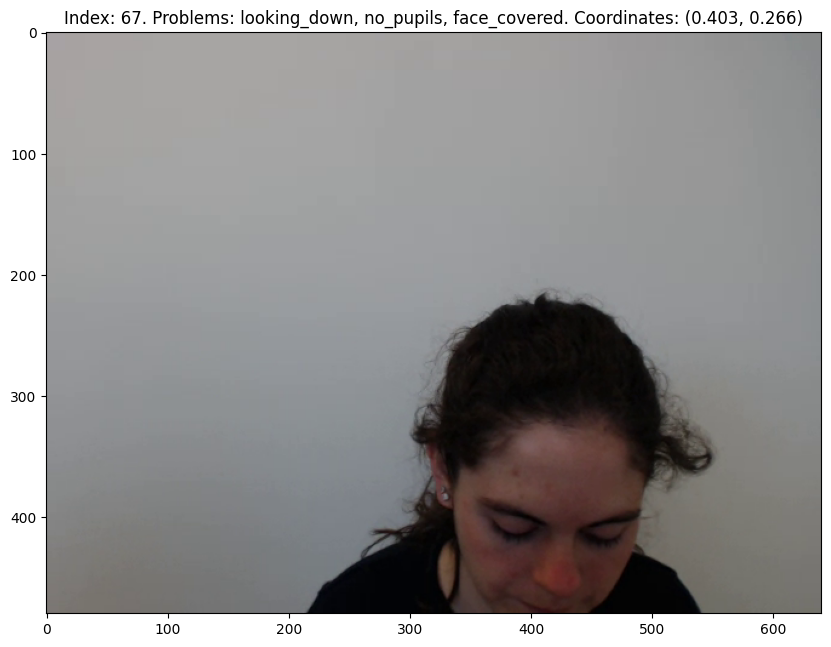

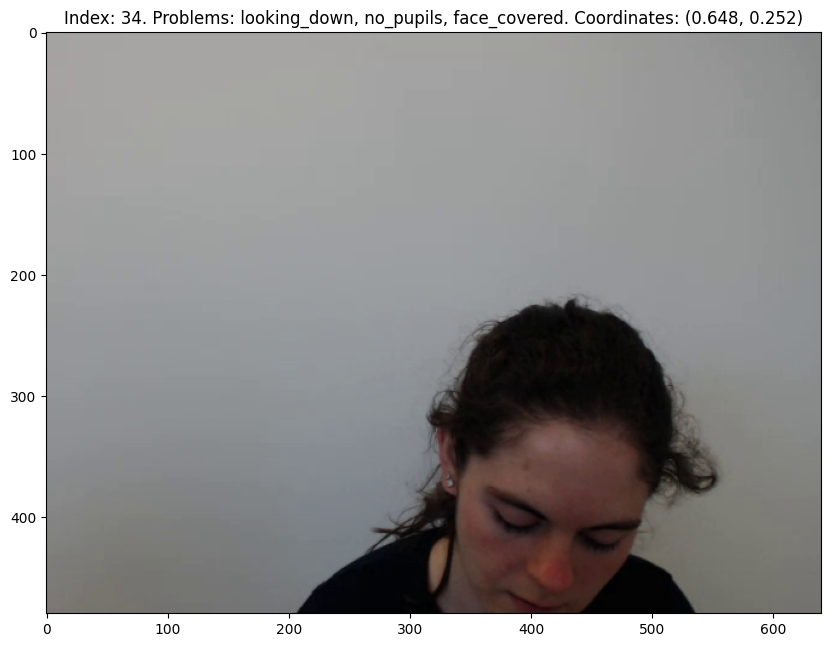

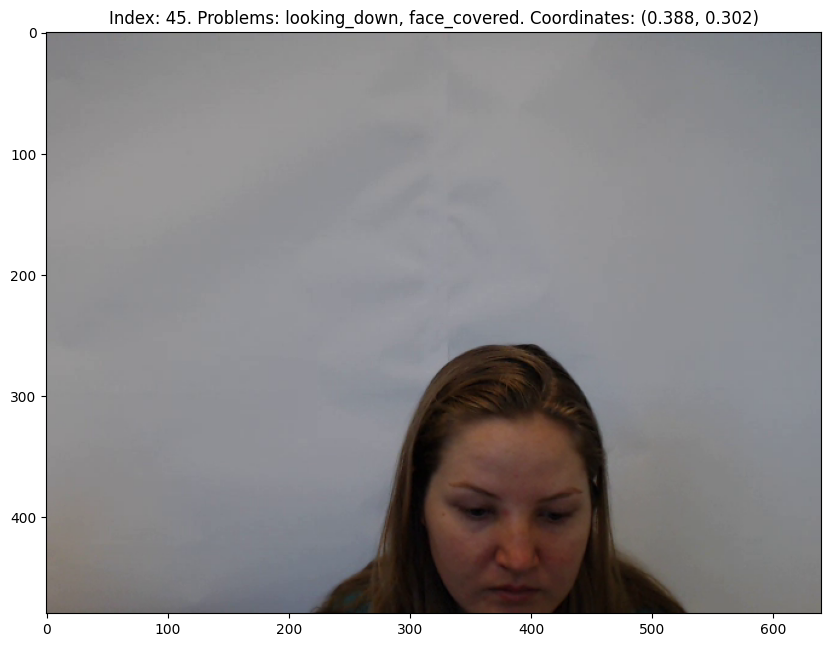

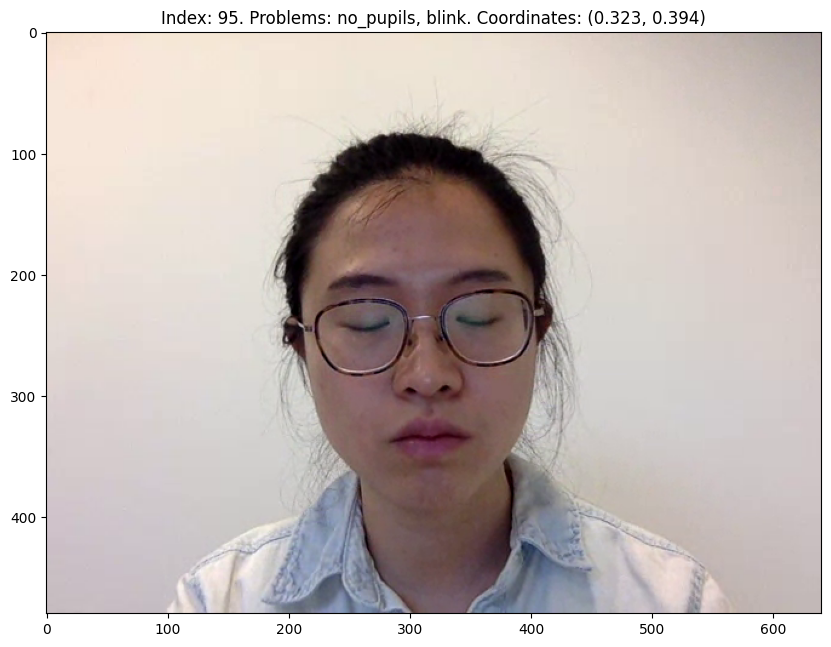

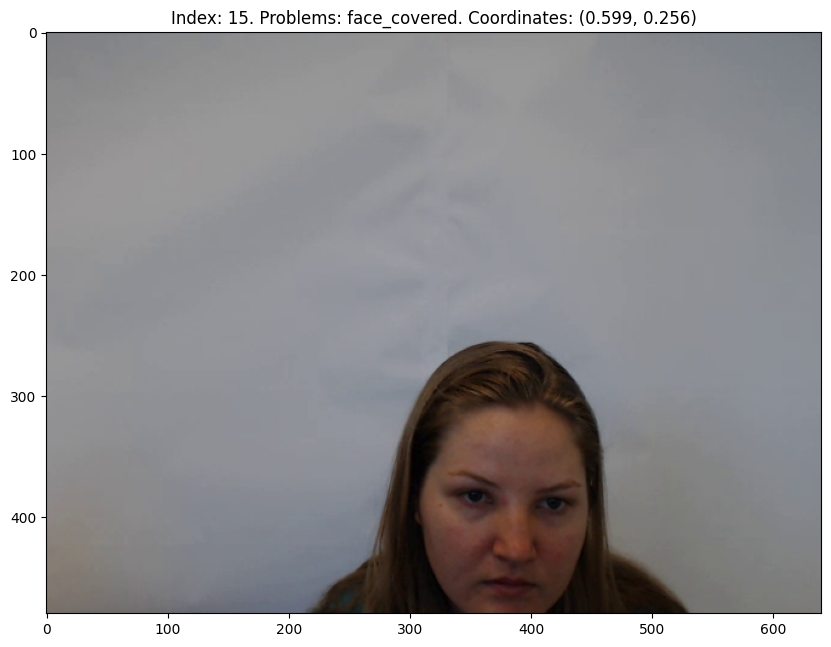

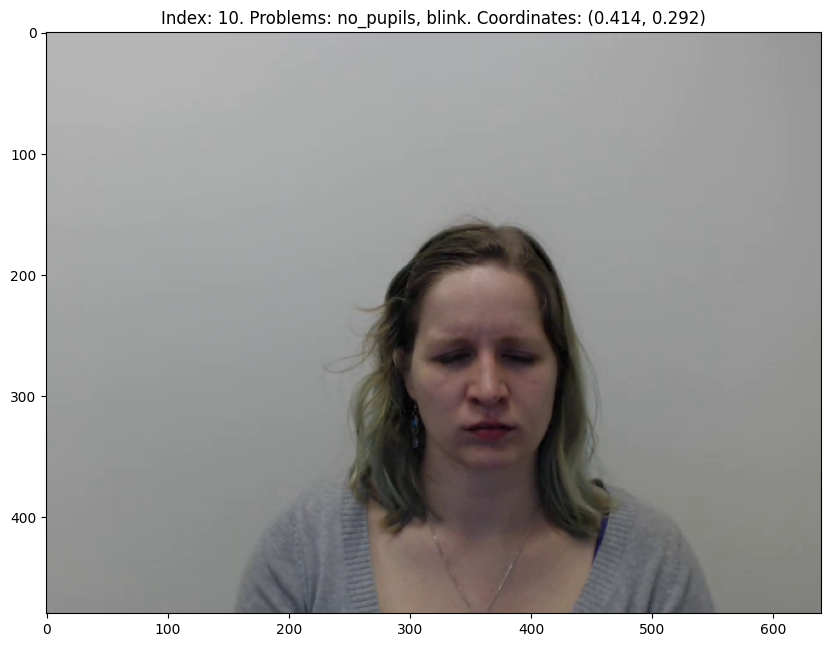

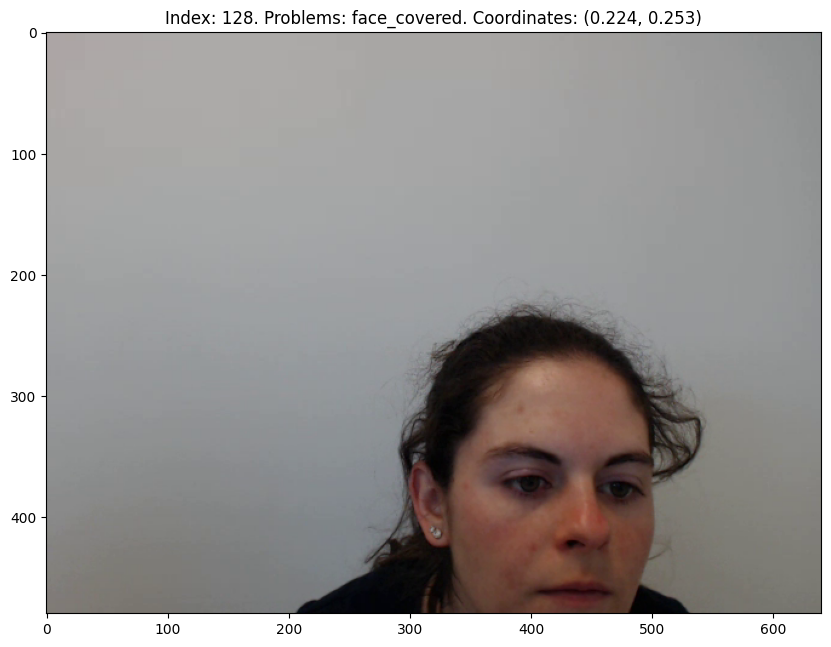

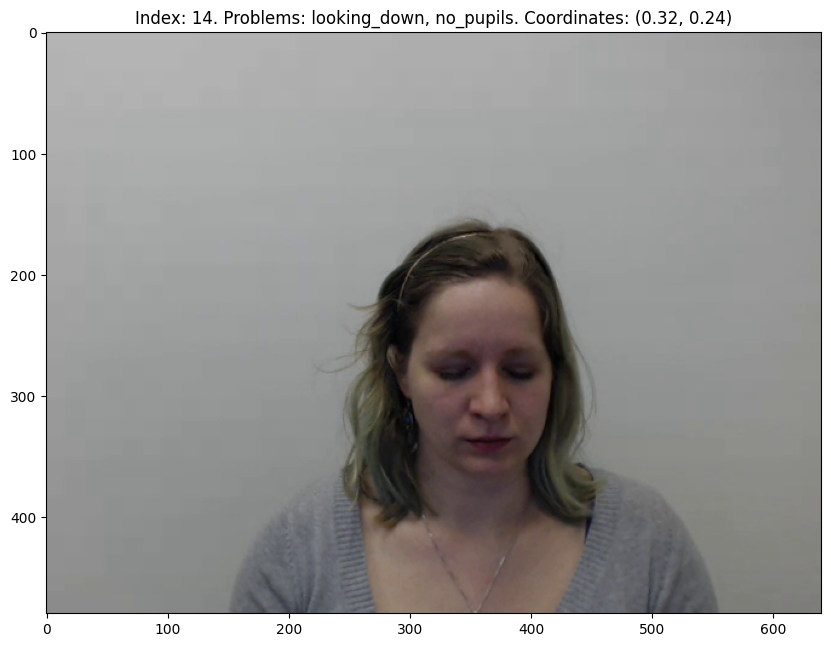

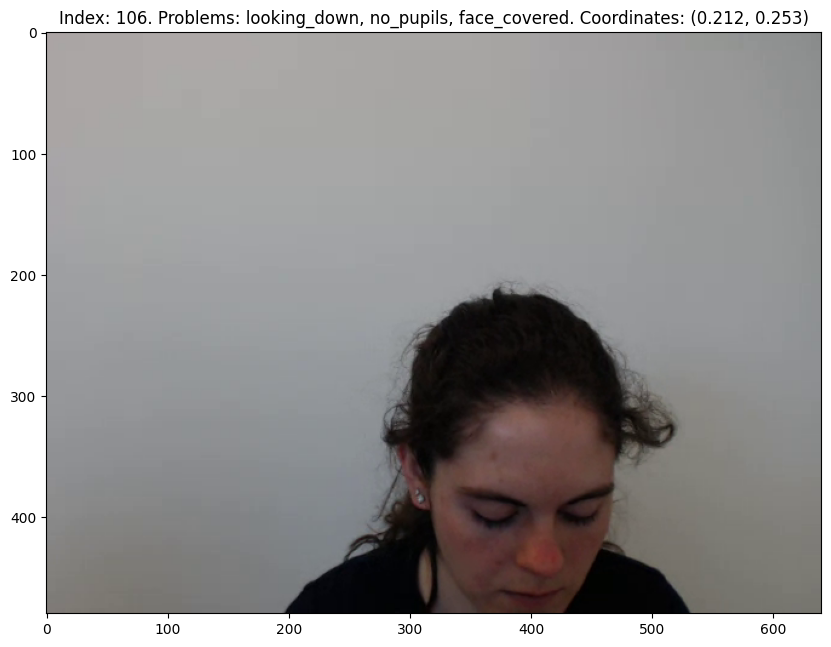

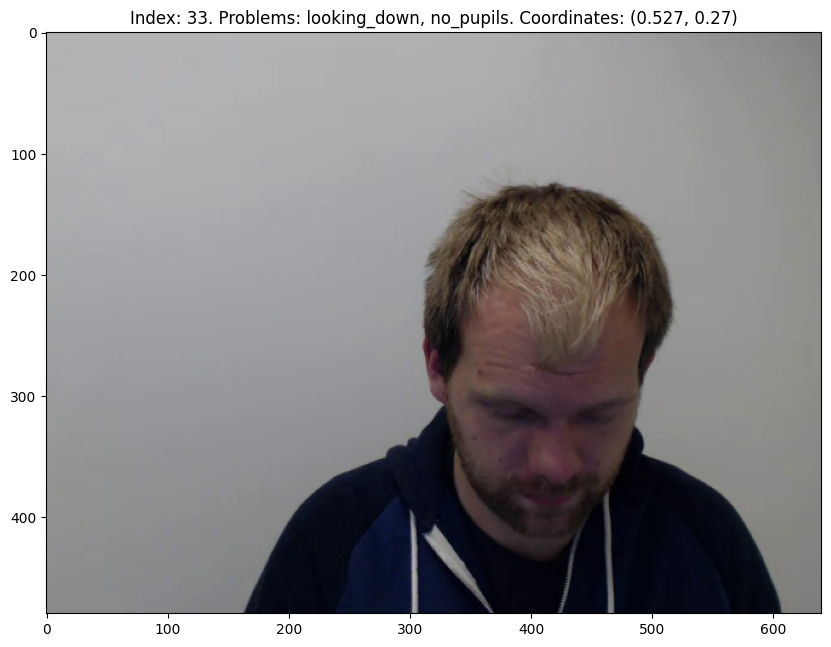

In [55]:
for index_test in indices_test:
    row = bad_df_paths.iloc[index_test]
    path = row['paths']
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    problems = columns_indicators[row.values[:4].astype(bool)]
    problems_str = ', '.join(problems)
    plt.figure(figsize=(10, 8))
    plt.title(f'Index: {index_test}. Problems: {problems_str}. Coordinates: ({round(row["x_normalized"],3)}, {round(row["y_normalized"],3)})')
    plt.imshow(img)
    plt.show()

### Normal images examples

In [47]:
bad_image_names = bad_df['Image_name'].values
good_df = df_clicks[~df_clicks['full_name'].isin(bad_image_names)]
good_df.shape

(1094, 4)

In [48]:
indices_test = np.random.randint(0, good_df.shape[0] - 1, 10)

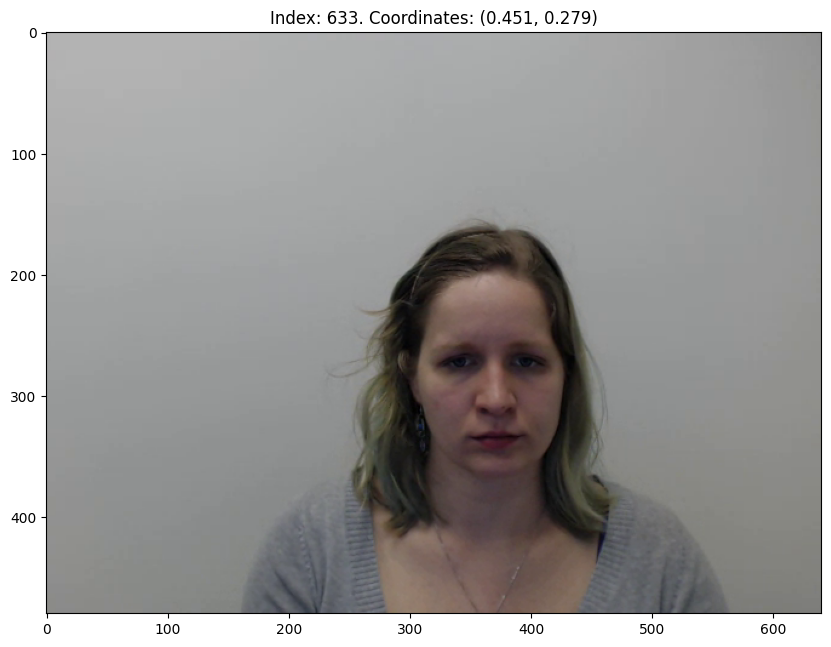

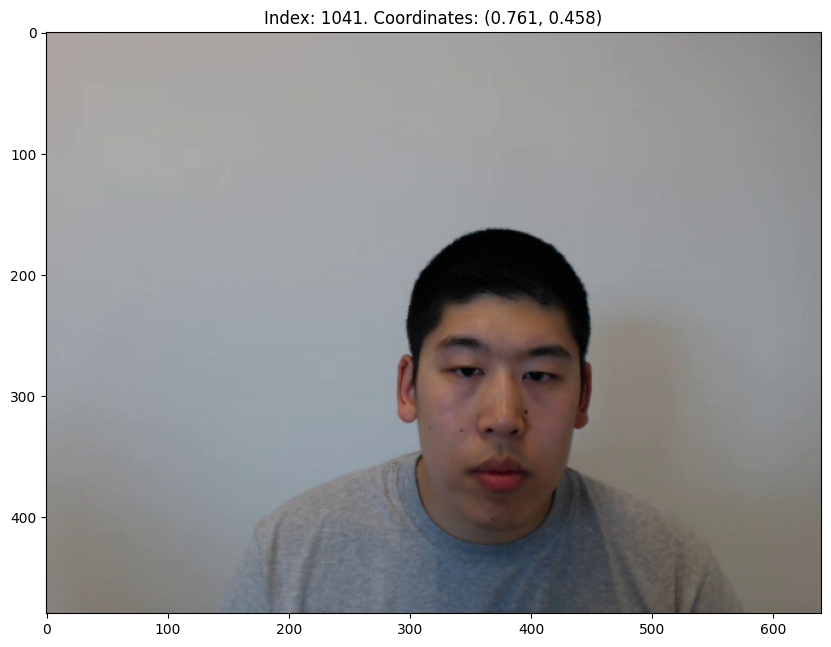

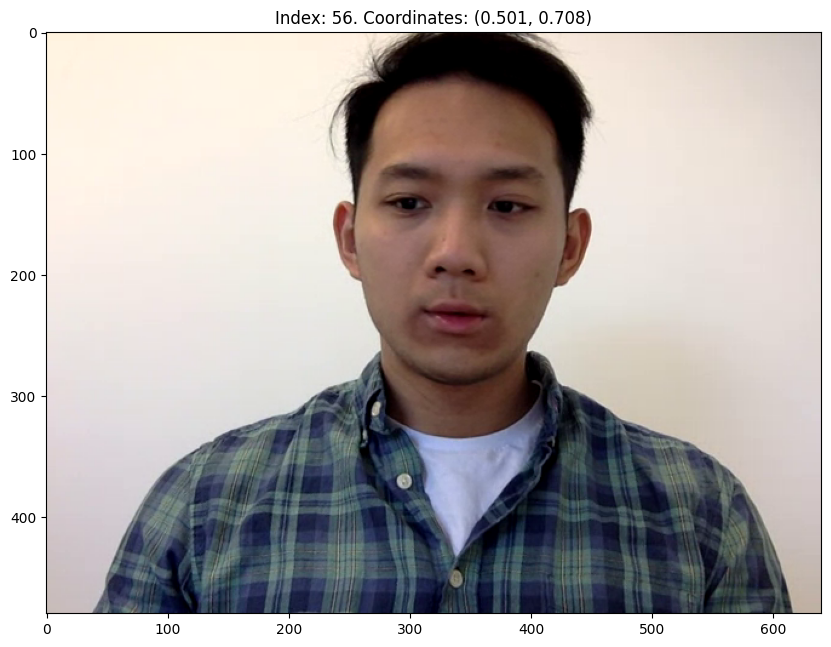

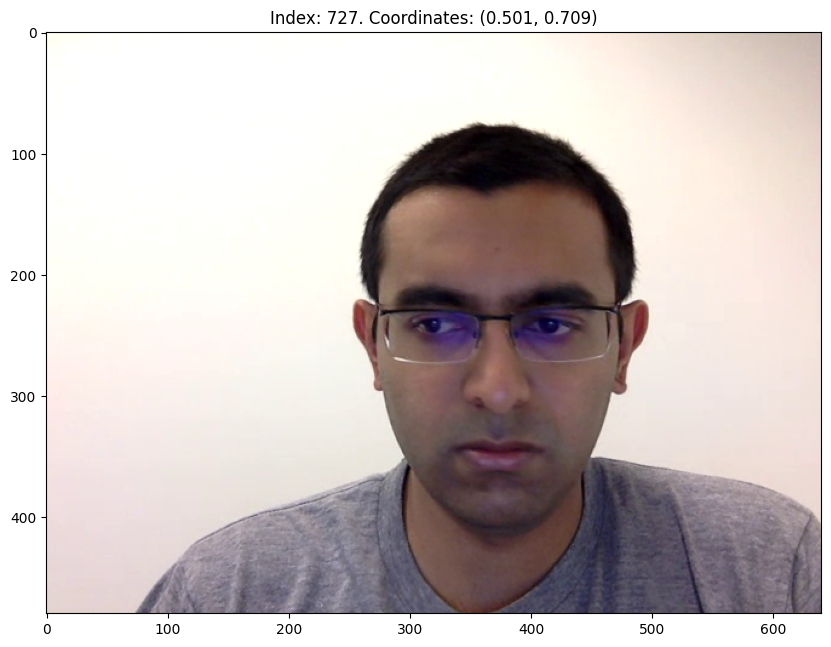

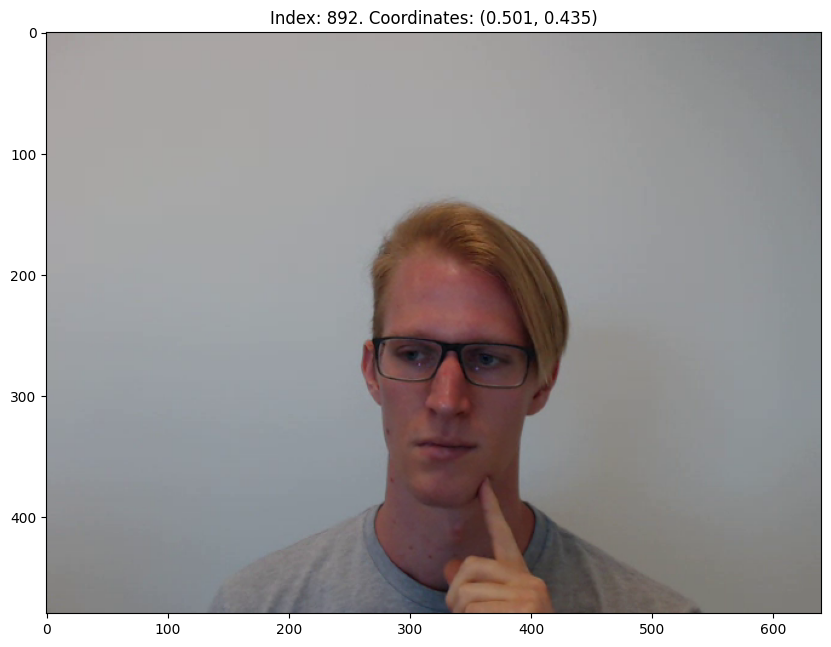

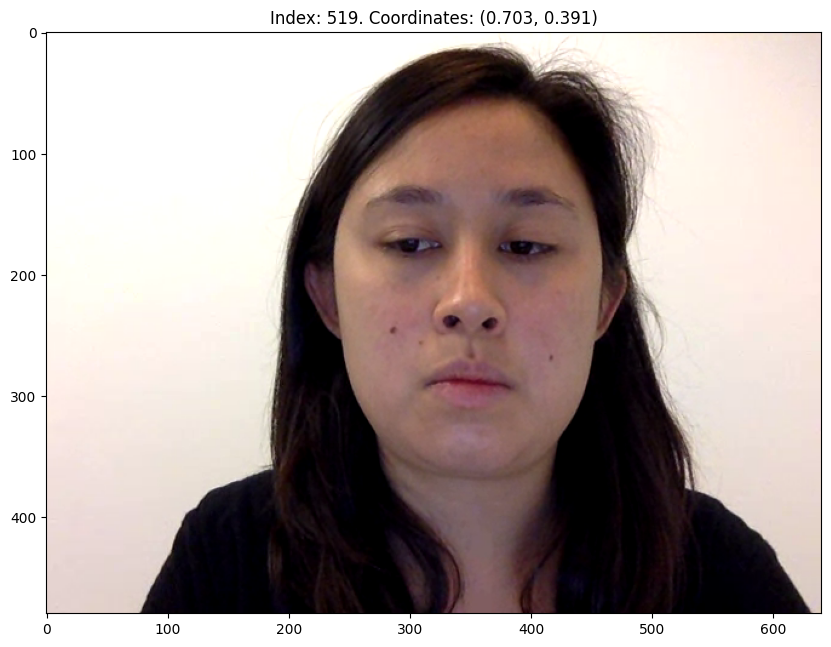

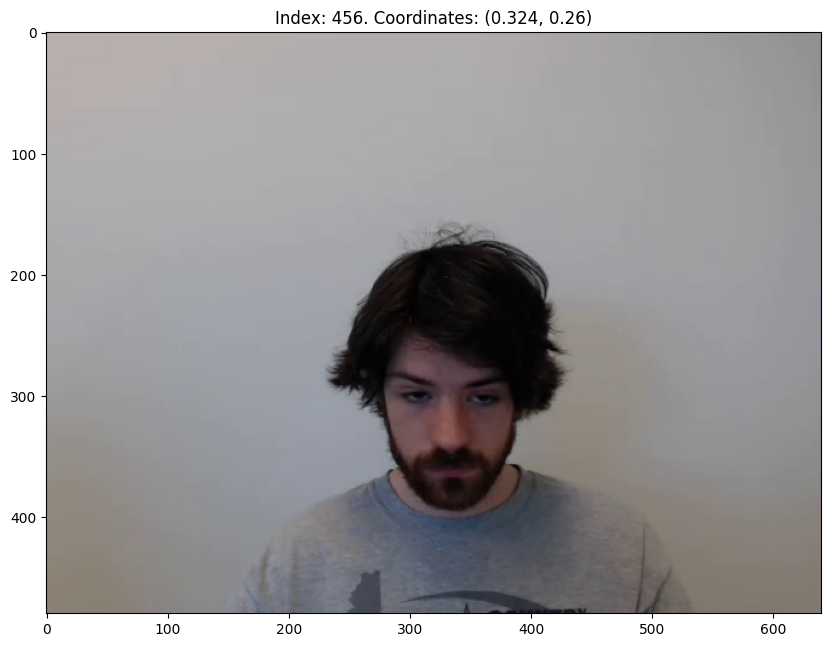

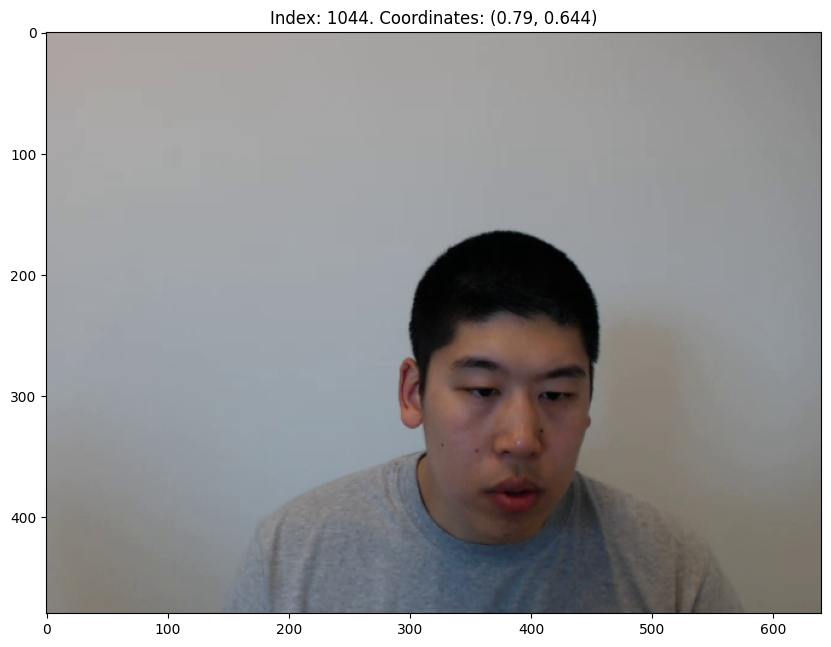

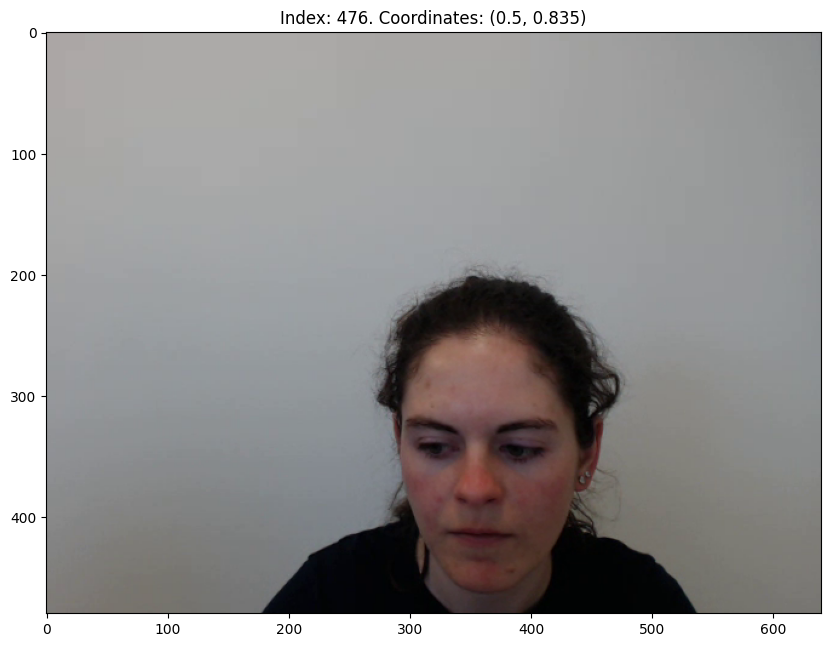

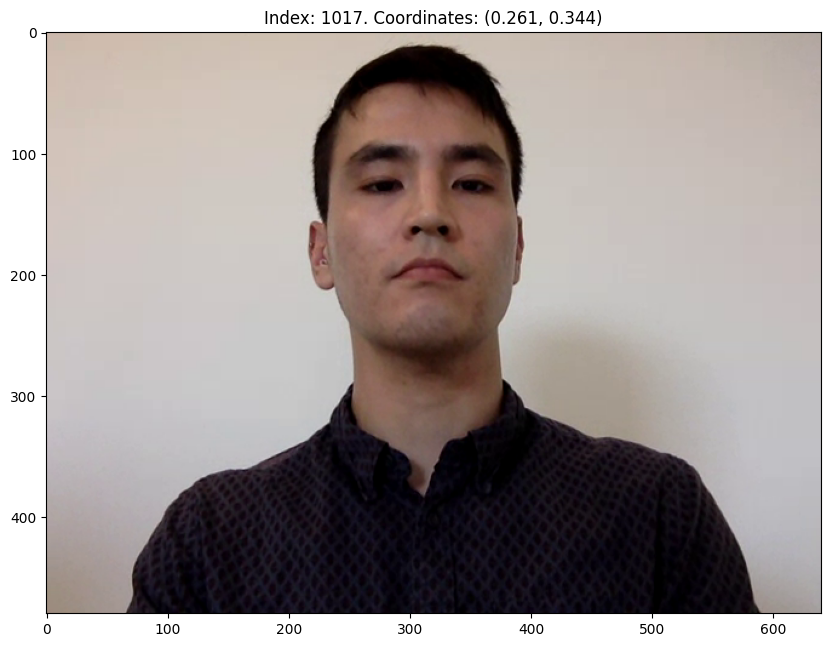

In [50]:
for index_test in indices_test:
    row = good_df.iloc[index_test]
    path = row['paths']
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 8))
    plt.title(f'Index: {index_test}. Coordinates: ({round(row["x_normalized"],3)}, {round(row["y_normalized"],3)})')
    plt.imshow(img)
    plt.show()

## Check if all images are copied

In [27]:
df = pd.read_csv("./data_tobii_names.csv")

In [3]:
# df["paths"] = df["full_name"].apply(lambda x: f"/home/ubuntu/projects/tweakle/data/tobii_images/{x}")
# df["paths"].head()

0    /home/ubuntu/projects/tweakle/data/tobii_image...
1    /home/ubuntu/projects/tweakle/data/tobii_image...
2    /home/ubuntu/projects/tweakle/data/tobii_image...
3    /home/ubuntu/projects/tweakle/data/tobii_image...
4    /home/ubuntu/projects/tweakle/data/tobii_image...
Name: paths, dtype: object

In [ ]:
missing_list = []
open_cv_read = []
i = 0
for path in tqdm(df["paths"].values):
    if not os.path.exists(path):
        missing_list.append(path)
    try:
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.
    except:
        open_cv_read.append(path)
    i += 1
    if i % 1000 == 0:
        print(len(open_cv_read))

  0%|                                  | 1014/748864 [00:08<1:46:34, 116.95it/s]

0


  0%|                                  | 2014/748864 [00:16<1:44:15, 119.39it/s]

0


  0%|▏                                 | 3012/748864 [00:25<1:43:20, 120.29it/s]

0


  1%|▏                                 | 4011/748864 [00:33<1:47:33, 115.43it/s]

0


  1%|▏                                  | 5009/748864 [00:43<2:08:37, 96.38it/s]

0


  1%|▎                                 | 6020/748864 [00:53<2:00:09, 103.03it/s]

0


  1%|▎                                 | 7014/748864 [01:03<2:02:01, 101.33it/s]

0


  1%|▎                                 | 8010/748864 [01:13<2:02:06, 101.13it/s]

0


  1%|▍                                 | 9017/748864 [01:23<2:03:17, 100.01it/s]

0


  1%|▍                                 | 10016/748864 [01:34<2:04:51, 98.63it/s]

0


  1%|▌                                 | 11013/748864 [01:44<2:05:53, 97.69it/s]

0


  2%|▌                                 | 12010/748864 [01:54<2:04:12, 98.87it/s]

0


  2%|▌                                | 13011/748864 [02:04<2:00:14, 101.99it/s]

0


  2%|▋                                 | 14010/748864 [02:14<2:06:15, 97.00it/s]

0


  2%|▋                                 | 15018/748864 [02:24<2:09:28, 94.46it/s]

0


  2%|▋                                 | 16013/748864 [02:35<2:09:32, 94.29it/s]

0


  2%|▋                                | 17014/748864 [02:44<1:48:39, 112.25it/s]

0


  2%|▊                                | 18016/748864 [02:53<1:45:09, 115.83it/s]

0


  3%|▊                                | 19020/748864 [03:01<1:47:14, 113.42it/s]

0


  3%|▉                                | 20022/748864 [03:10<1:47:07, 113.39it/s]

0


  3%|▉                                | 21014/748864 [03:19<1:44:36, 115.96it/s]

0


  3%|▉                                | 22011/748864 [03:27<1:48:35, 111.55it/s]

0


  3%|█                                | 23020/748864 [03:36<1:44:38, 115.61it/s]

0


  3%|█                                | 24022/748864 [03:45<1:48:15, 111.59it/s]

0


  3%|█                                | 25017/748864 [03:54<1:51:05, 108.60it/s]

0


  3%|█▏                               | 26016/748864 [04:03<1:48:19, 111.22it/s]

0


  4%|█▏                               | 27017/748864 [04:12<1:45:27, 114.07it/s]

0


  4%|█▏                               | 28012/748864 [04:20<1:42:21, 117.38it/s]

0


  4%|█▎                               | 29019/748864 [04:29<1:46:23, 112.77it/s]

0


  4%|█▎                               | 30019/748864 [04:38<1:43:31, 115.72it/s]

0


  4%|█▎                               | 31020/748864 [04:47<1:44:41, 114.28it/s]

0


  4%|█▍                               | 32013/748864 [04:55<1:42:26, 116.62it/s]

0


  4%|█▍                               | 33018/748864 [05:04<1:42:45, 116.10it/s]

0


  5%|█▍                               | 34010/748864 [05:13<1:48:11, 110.11it/s]

0


  5%|█▌                               | 35023/748864 [05:22<1:42:30, 116.05it/s]

0


  5%|█▌                               | 36020/748864 [05:31<1:51:38, 106.42it/s]

0


  5%|█▋                               | 37024/748864 [05:39<1:41:17, 117.12it/s]

0


  5%|█▋                                | 38008/748864 [05:49<2:18:04, 85.81it/s]

0


  5%|█▊                                | 39008/748864 [06:01<2:19:21, 84.89it/s]

0


  5%|█▊                                | 40016/748864 [06:13<2:18:43, 85.16it/s]

0


  5%|█▊                                | 41006/748864 [06:25<2:25:30, 81.08it/s]

0


  6%|█▉                                | 42012/748864 [06:38<2:17:20, 85.78it/s]

0


  6%|█▉                                | 43015/748864 [06:50<2:20:41, 83.62it/s]

0


  6%|█▉                                | 44015/748864 [07:02<2:19:55, 83.95it/s]

0


  6%|██                                | 45009/748864 [07:14<2:21:25, 82.95it/s]

0


  6%|██                                | 46011/748864 [07:27<2:20:42, 83.25it/s]

0


  6%|██▏                               | 47009/748864 [07:39<2:21:05, 82.91it/s]

0


  6%|██▏                               | 48009/748864 [07:51<2:20:31, 83.12it/s]

0


  7%|██▏                               | 49014/748864 [08:03<2:31:02, 77.23it/s]

0


  7%|██▎                               | 50010/748864 [08:15<2:30:57, 77.16it/s]

0


  7%|██▎                               | 51011/748864 [08:28<2:28:54, 78.11it/s]

0


  7%|██▎                               | 52016/748864 [08:41<2:24:00, 80.65it/s]

0


  7%|██▍                               | 53015/748864 [08:53<2:24:43, 80.13it/s]

0


  7%|██▍                               | 54015/748864 [09:06<2:28:38, 77.91it/s]

0


  7%|██▍                               | 55015/748864 [09:18<2:21:22, 81.80it/s]

0


  7%|██▌                               | 56011/748864 [09:30<2:25:26, 79.40it/s]

0


  8%|██▌                               | 57013/748864 [09:42<2:20:26, 82.10it/s]

0


  8%|██▋                               | 58014/748864 [09:54<2:09:10, 89.14it/s]

0


  8%|██▌                              | 59015/748864 [10:05<1:51:42, 102.92it/s]

0


  8%|██▋                              | 60020/748864 [10:15<1:48:03, 106.24it/s]

0


  8%|██▋                              | 61013/748864 [10:24<1:50:44, 103.53it/s]

0


  8%|██▋                              | 62011/748864 [10:34<1:50:47, 103.32it/s]

0


  8%|██▊                              | 63023/748864 [10:44<1:41:26, 112.69it/s]

0


  9%|██▊                              | 64018/748864 [10:53<1:50:38, 103.16it/s]

0


  9%|██▊                              | 65015/748864 [11:03<1:49:27, 104.13it/s]

0


  9%|██▉                              | 66013/748864 [11:12<1:50:45, 102.75it/s]

0


  9%|██▉                              | 67021/748864 [11:22<1:46:41, 106.51it/s]

0


  9%|██▉                              | 68021/748864 [11:32<1:47:51, 105.21it/s]

0


  9%|███                              | 69019/748864 [11:41<1:50:36, 102.45it/s]

0


  9%|███                              | 70016/748864 [11:51<1:52:07, 100.91it/s]

0


  9%|███▏                             | 71011/748864 [12:00<1:49:37, 103.06it/s]

0


 10%|███▏                             | 72022/748864 [12:10<1:42:56, 109.59it/s]

0


 10%|███▎                              | 73014/748864 [12:21<2:21:13, 79.76it/s]

0


 10%|███▎                              | 74012/748864 [12:33<2:23:42, 78.27it/s]

0


 10%|███▍                              | 75012/748864 [12:46<2:06:56, 88.47it/s]

0


 10%|███▍                              | 76016/748864 [12:57<2:01:17, 92.46it/s]

0


 10%|███▍                              | 77008/748864 [13:08<2:08:34, 87.09it/s]

0


 10%|███▌                              | 78012/748864 [13:20<2:00:44, 92.60it/s]

0


 11%|███▌                              | 79014/748864 [13:30<2:00:13, 92.86it/s]

0


 11%|███▋                              | 80013/748864 [13:42<2:29:26, 74.59it/s]

0


 11%|███▋                              | 81010/748864 [13:54<2:19:02, 80.06it/s]

0


 11%|███▋                              | 82011/748864 [14:07<2:19:50, 79.48it/s]

0


 11%|███▊                              | 83007/748864 [14:20<2:18:08, 80.33it/s]

0


 11%|███▊                              | 84008/748864 [14:33<2:25:52, 75.96it/s]

0


 11%|███▊                              | 85012/748864 [14:46<2:22:03, 77.88it/s]

0


 11%|███▉                              | 86008/748864 [14:58<2:16:40, 80.83it/s]

0


 12%|███▉                              | 87016/748864 [15:11<2:17:33, 80.19it/s]

0


 12%|███▉                              | 88016/748864 [15:23<2:08:12, 85.90it/s]

0


 12%|████                              | 89012/748864 [15:35<2:16:07, 80.79it/s]

0


 12%|████                              | 90014/748864 [15:47<2:13:17, 82.39it/s]

0


 12%|████▏                             | 91014/748864 [15:59<2:11:11, 83.58it/s]

0


 12%|████▏                             | 92015/748864 [16:11<2:11:49, 83.05it/s]

0


 12%|████▏                             | 93012/748864 [16:23<2:15:41, 80.56it/s]

0


 13%|████▎                             | 94017/748864 [16:35<2:08:33, 84.90it/s]

0


 13%|████▎                             | 95014/748864 [16:47<2:03:09, 88.49it/s]

0


 13%|████▎                             | 96010/748864 [16:58<2:05:11, 86.92it/s]

0


 13%|████▍                             | 97008/748864 [17:10<2:06:17, 86.03it/s]

0


 13%|████▍                             | 98017/748864 [17:21<2:02:51, 88.29it/s]

0


 13%|████▍                             | 99010/748864 [17:33<2:05:26, 86.34it/s]

0


 13%|████▍                            | 100009/748864 [17:45<2:05:54, 85.88it/s]

0


 13%|████▍                            | 101015/748864 [17:56<2:00:08, 89.87it/s]

0


 14%|████▍                            | 102015/748864 [18:08<2:03:36, 87.21it/s]

0


 14%|████▌                            | 103016/748864 [18:19<2:03:05, 87.45it/s]

0


 14%|████▌                            | 104013/748864 [18:31<2:05:46, 85.45it/s]

0


 14%|████▍                           | 105012/748864 [18:41<1:43:16, 103.91it/s]

0


 14%|████▋                            | 106013/748864 [18:51<1:47:36, 99.57it/s]

0


 14%|████▌                           | 107010/748864 [19:01<1:46:43, 100.23it/s]

0


 14%|████▊                            | 108012/748864 [19:11<1:54:56, 92.93it/s]

0


 15%|████▊                            | 109013/748864 [19:23<2:08:04, 83.27it/s]

0


 15%|████▊                            | 110013/748864 [19:35<2:10:35, 81.54it/s]

0


 15%|████▉                            | 111010/748864 [19:47<2:03:35, 86.01it/s]

0


 15%|████▉                            | 112013/748864 [19:59<2:06:56, 83.62it/s]

0


 15%|████▉                            | 113013/748864 [20:11<2:03:48, 85.59it/s]

0


 15%|█████                            | 114017/748864 [20:22<1:57:11, 90.28it/s]

0


 15%|█████                            | 115015/748864 [20:34<2:01:07, 87.21it/s]

0


 15%|█████                            | 116013/748864 [20:46<2:03:39, 85.30it/s]

0


 16%|█████▏                           | 117015/748864 [20:57<2:01:17, 86.82it/s]

0


 16%|█████▏                           | 118009/748864 [21:09<2:01:44, 86.36it/s]

0


 16%|█████▏                           | 119013/748864 [21:20<2:04:19, 84.44it/s]

0


 16%|█████▎                           | 120014/748864 [21:32<2:00:22, 87.06it/s]

0


 16%|█████▎                           | 121014/748864 [21:43<2:01:34, 86.08it/s]

0


 16%|█████▍                           | 122013/748864 [21:55<1:58:49, 87.92it/s]

0


 16%|█████▍                           | 123012/748864 [22:06<1:59:08, 87.54it/s]

0


 17%|█████▍                           | 124017/748864 [22:18<1:54:28, 90.97it/s]

0


 17%|█████▌                           | 125014/748864 [22:29<2:00:02, 86.62it/s]

0


 17%|█████▌                           | 126013/748864 [22:40<1:51:15, 93.30it/s]

0


 17%|█████▌                           | 127015/748864 [22:52<2:10:40, 79.31it/s]

0


 17%|█████▋                           | 128012/748864 [23:03<2:02:43, 84.32it/s]

0


 17%|█████▋                           | 129012/748864 [23:14<1:57:57, 87.58it/s]

0


 17%|█████▋                           | 130016/748864 [23:25<1:55:16, 89.47it/s]

0


 17%|█████▊                           | 131012/748864 [23:37<2:06:41, 81.28it/s]

0


 18%|█████▊                           | 132009/748864 [23:49<2:05:53, 81.66it/s]

0


 18%|█████▊                           | 133014/748864 [24:01<2:00:37, 85.09it/s]

0


 18%|█████▉                           | 134008/748864 [24:13<2:09:35, 79.08it/s]

0


 18%|█████▉                           | 135016/748864 [24:26<2:03:37, 82.76it/s]

0


 18%|█████▉                           | 136013/748864 [24:38<2:08:26, 79.53it/s]

0


 18%|██████                           | 137011/748864 [24:51<1:54:13, 89.28it/s]

0


 18%|█████▉                          | 138012/748864 [25:01<1:38:54, 102.93it/s]

0


 19%|█████▉                          | 139012/748864 [25:11<1:39:28, 102.18it/s]

0


 19%|█████▉                          | 140020/748864 [25:21<1:40:15, 101.22it/s]

0


 19%|██████                          | 141012/748864 [25:30<1:36:48, 104.64it/s]

0


 19%|██████                          | 142020/748864 [25:41<1:40:01, 101.12it/s]

0


 19%|██████                          | 143016/748864 [25:51<1:38:14, 102.78it/s]

0


 19%|██████▏                         | 144012/748864 [26:00<1:39:37, 101.19it/s]

0


 19%|██████▏                         | 145014/748864 [26:10<1:40:20, 100.30it/s]

0


 19%|██████▏                         | 146016/748864 [26:20<1:40:22, 100.10it/s]

0


 20%|██████▍                          | 147010/748864 [26:30<1:42:50, 97.54it/s]

0


 20%|██████▎                         | 148013/748864 [26:40<1:39:53, 100.25it/s]

0


 20%|██████▌                          | 149013/748864 [26:50<1:41:31, 98.47it/s]

0


 20%|██████▌                          | 150016/748864 [27:01<1:51:51, 89.23it/s]

0


 20%|██████▋                          | 151019/748864 [27:11<1:41:14, 98.42it/s]

0


 20%|██████▋                          | 152012/748864 [27:22<1:45:41, 94.12it/s]

4


 20%|██████▋                          | 153015/748864 [27:32<1:44:42, 94.85it/s]

6


 21%|██████▊                          | 154013/748864 [27:42<1:39:21, 99.78it/s]

6


 21%|██████▊                          | 155016/748864 [27:52<1:40:35, 98.40it/s]

6


 21%|██████▋                         | 156011/748864 [28:02<1:36:43, 102.15it/s]

6


 21%|██████▉                          | 157016/748864 [28:13<1:41:53, 96.81it/s]

6


 21%|██████▉                          | 158018/748864 [28:23<1:38:38, 99.83it/s]

6


 21%|███████                          | 159017/748864 [28:33<1:40:06, 98.20it/s]

6


 21%|███████                          | 160017/748864 [28:43<1:44:11, 94.19it/s]

6


 22%|██████▉                         | 161016/748864 [28:53<1:37:05, 100.91it/s]

6


 22%|███████▏                         | 162018/748864 [29:04<1:44:23, 93.70it/s]

6


 22%|███████▏                         | 163014/748864 [29:14<1:40:35, 97.07it/s]

6


 22%|███████▏                         | 164011/748864 [29:25<1:41:01, 96.49it/s]

6


 22%|███████▎                         | 165010/748864 [29:35<1:41:49, 95.56it/s]

6


 22%|███████▎                         | 166015/748864 [29:46<1:39:04, 98.04it/s]

6


 22%|███████▎                         | 167019/748864 [29:56<1:43:41, 93.52it/s]

6


 22%|███████▍                         | 168014/748864 [30:07<1:42:58, 94.01it/s]

6


 23%|███████▍                         | 169010/748864 [30:18<1:46:23, 90.84it/s]

6


 23%|███████▍                         | 170019/748864 [30:28<1:40:14, 96.23it/s]

6


 23%|███████▌                         | 171011/748864 [30:38<1:39:41, 96.60it/s]

6


 23%|███████▎                        | 172010/748864 [30:48<1:31:59, 104.51it/s]

6


 23%|███████▍                        | 173017/748864 [30:58<1:33:19, 102.84it/s]

6


 23%|███████▋                         | 174017/748864 [31:07<1:36:34, 99.20it/s]

6


 23%|███████▍                        | 175015/748864 [31:17<1:32:55, 102.92it/s]

6


 24%|███████▌                        | 176019/748864 [31:27<1:32:36, 103.09it/s]

6


 24%|███████▌                        | 177017/748864 [31:37<1:34:47, 100.55it/s]

6


 24%|███████▊                         | 178014/748864 [31:47<1:35:47, 99.32it/s]

6


 24%|███████▋                        | 179020/748864 [31:57<1:33:45, 101.29it/s]

6


 24%|███████▋                        | 180014/748864 [32:07<1:34:42, 100.11it/s]

6


 24%|███████▉                         | 181014/748864 [32:17<1:35:02, 99.58it/s]

6


 24%|███████▊                        | 182013/748864 [32:27<1:32:16, 102.38it/s]

6


 24%|███████▊                        | 183013/748864 [32:37<1:32:53, 101.53it/s]

6


 25%|███████▊                        | 184020/748864 [32:47<1:33:35, 100.59it/s]

6


 25%|████████▏                        | 185018/748864 [32:57<1:35:47, 98.10it/s]

6


 25%|████████▏                        | 186015/748864 [33:07<1:37:43, 96.00it/s]

6


 25%|████████▏                        | 187014/748864 [33:17<1:39:09, 94.43it/s]

6


 25%|████████                        | 188011/748864 [33:27<1:31:31, 102.13it/s]

6


 25%|████████▎                        | 189014/748864 [33:37<1:35:32, 97.66it/s]

6


 25%|████████▎                        | 190010/748864 [33:47<1:33:26, 99.68it/s]

6


 26%|████████▍                        | 191011/748864 [33:58<1:38:28, 94.42it/s]

6


 26%|████████▏                       | 192020/748864 [34:08<1:29:10, 104.07it/s]

6


 26%|████████▏                       | 193017/748864 [34:17<1:24:14, 109.97it/s]

6


 26%|████████▎                       | 194011/748864 [34:26<1:26:26, 106.98it/s]

6


 26%|████████▎                       | 195020/748864 [34:36<1:21:43, 112.96it/s]

6


 26%|████████▍                       | 196012/748864 [34:45<1:24:58, 108.43it/s]

6


 26%|████████▍                       | 197022/748864 [34:54<1:18:59, 116.44it/s]

6


 26%|████████▍                       | 198015/748864 [35:03<1:22:33, 111.21it/s]

6


 27%|████████▌                       | 199011/748864 [35:12<1:25:32, 107.12it/s]

6


 27%|████████▊                        | 200009/748864 [35:23<1:35:22, 95.91it/s]

6


 27%|████████▊                        | 201010/748864 [35:33<1:34:58, 96.14it/s]

6


 27%|████████▉                        | 202017/748864 [35:44<1:42:58, 88.50it/s]

6


 27%|████████▉                        | 203013/748864 [35:54<1:35:58, 94.78it/s]

6


 27%|████████▉                        | 204011/748864 [36:05<1:34:12, 96.39it/s]

6


 27%|████████▊                       | 205013/748864 [36:15<1:19:27, 114.08it/s]

6


 28%|████████▊                       | 206018/748864 [36:24<1:16:49, 117.76it/s]

6


 28%|████████▊                       | 207023/748864 [36:33<1:19:15, 113.93it/s]

6


 28%|████████▉                       | 208013/748864 [36:42<1:20:23, 112.14it/s]

6


 28%|████████▉                       | 209020/748864 [36:51<1:19:07, 113.72it/s]

6


 28%|████████▉                       | 210022/748864 [36:59<1:19:07, 113.49it/s]

6


 28%|█████████                       | 211012/748864 [37:09<1:24:45, 105.76it/s]

6


 28%|█████████                       | 212013/748864 [37:18<1:14:28, 120.15it/s]

6


 28%|█████████                       | 213014/748864 [37:27<1:22:25, 108.35it/s]

6


 29%|█████████▏                      | 214014/748864 [37:35<1:19:55, 111.54it/s]

6


 29%|█████████▍                       | 215017/748864 [37:45<1:38:21, 90.46it/s]

6


 29%|█████████▌                       | 216014/748864 [37:56<1:35:43, 92.78it/s]

6


 29%|█████████▌                       | 217012/748864 [38:06<1:30:40, 97.76it/s]

6


 29%|█████████▌                       | 218016/748864 [38:17<1:43:14, 85.70it/s]

6


 29%|█████████▋                       | 219019/748864 [38:27<1:30:39, 97.40it/s]

6


 29%|█████████▋                       | 220018/748864 [38:38<1:28:40, 99.39it/s]

6


 30%|█████████▋                       | 221018/748864 [38:49<1:34:26, 93.15it/s]

6


 30%|█████████▊                       | 222018/748864 [38:59<1:30:06, 97.45it/s]

6


 30%|█████████▊                       | 223010/748864 [39:10<1:43:12, 84.91it/s]

6


 30%|█████████▊                       | 224014/748864 [39:22<1:42:13, 85.57it/s]

6


 30%|█████████▉                       | 225008/748864 [39:34<1:45:31, 82.74it/s]

6


 30%|█████████▉                       | 226009/748864 [39:46<1:43:39, 84.07it/s]

6


 30%|██████████                       | 227008/748864 [39:58<1:45:18, 82.60it/s]

6


 30%|██████████                       | 228012/748864 [40:09<1:41:44, 85.33it/s]

6


 31%|██████████                       | 229014/748864 [40:21<1:44:38, 82.80it/s]

6


 31%|██████████▏                      | 230008/748864 [40:33<1:40:37, 85.95it/s]

6


 31%|██████████▏                      | 231011/748864 [40:44<1:37:54, 88.15it/s]

6


 31%|██████████▏                      | 232010/748864 [40:56<1:43:50, 82.95it/s]

6


 31%|██████████▎                      | 233009/748864 [41:08<1:48:51, 78.98it/s]

6


 31%|██████████▎                      | 234009/748864 [41:20<1:42:12, 83.95it/s]

6


 31%|██████████▎                      | 235009/748864 [41:32<1:44:52, 81.66it/s]

6


 32%|██████████▍                      | 236014/748864 [41:43<1:33:54, 91.02it/s]

6


 32%|██████████▍                      | 237016/748864 [41:54<1:32:39, 92.07it/s]

6


 32%|██████████▍                      | 238014/748864 [42:05<1:30:34, 94.00it/s]

6


 32%|██████████▌                      | 239012/748864 [42:15<1:34:54, 89.53it/s]

6


 32%|██████████▌                      | 240018/748864 [42:26<1:29:29, 94.77it/s]

6


 32%|██████████▌                      | 241014/748864 [42:37<1:32:13, 91.78it/s]

6


 32%|██████████▋                      | 242020/748864 [42:48<1:29:22, 94.52it/s]

6


 32%|██████████▋                      | 243011/748864 [42:58<1:31:28, 92.17it/s]

6


 33%|██████████▊                      | 244017/748864 [43:09<1:26:50, 96.90it/s]

6


 33%|██████████▊                      | 245019/748864 [43:20<1:27:05, 96.43it/s]

6


 33%|██████████▊                      | 246013/748864 [43:30<1:26:43, 96.65it/s]

6


 33%|██████████▉                      | 247016/748864 [43:41<1:29:27, 93.50it/s]

6


 33%|██████████▉                      | 248016/748864 [43:51<1:28:23, 94.44it/s]

6


 33%|██████████▋                     | 249017/748864 [44:01<1:21:28, 102.25it/s]

6


 33%|██████████▋                     | 250022/748864 [44:10<1:10:04, 118.66it/s]

6


 34%|██████████▋                     | 251020/748864 [44:19<1:09:13, 119.87it/s]

6


 34%|██████████▊                     | 252017/748864 [44:27<1:08:04, 121.64it/s]

6


 34%|██████████▊                     | 253014/748864 [44:35<1:08:50, 120.05it/s]

6


 34%|██████████▊                     | 254011/748864 [44:44<1:10:12, 117.47it/s]

6


 34%|██████████▉                     | 255014/748864 [44:52<1:09:40, 118.13it/s]

6


 34%|██████████▉                     | 256019/748864 [45:00<1:08:40, 119.61it/s]

6


 34%|██████████▉                     | 257017/748864 [45:09<1:09:56, 117.20it/s]

6


 34%|███████████                     | 258016/748864 [45:17<1:09:52, 117.08it/s]

6


 35%|███████████                     | 259014/748864 [45:26<1:08:07, 119.84it/s]

6


 35%|███████████                     | 260017/748864 [45:34<1:08:13, 119.42it/s]

6


 35%|███████████▏                    | 261017/748864 [45:43<1:07:20, 120.75it/s]

6


 35%|███████████▏                    | 262017/748864 [45:51<1:05:50, 123.23it/s]

6


 35%|███████████▏                    | 263020/748864 [45:59<1:09:46, 116.04it/s]

6


 35%|███████████▎                    | 264018/748864 [46:08<1:07:29, 119.73it/s]

6


 35%|███████████▎                    | 265021/748864 [46:16<1:10:38, 114.16it/s]

6


 36%|███████████▎                    | 266023/748864 [46:25<1:08:14, 117.91it/s]

6


 36%|███████████▍                    | 267021/748864 [46:33<1:07:55, 118.22it/s]

6


 36%|███████████▍                    | 268012/748864 [46:42<1:08:30, 116.99it/s]

6


 36%|███████████▍                    | 269015/748864 [46:50<1:06:26, 120.38it/s]

6


 36%|███████████▌                    | 270015/748864 [46:59<1:07:03, 119.01it/s]

6


 36%|███████████▌                    | 271011/748864 [47:07<1:09:51, 114.00it/s]

6


 36%|███████████▌                    | 272014/748864 [47:16<1:04:50, 122.57it/s]

6


 36%|███████████▋                    | 273015/748864 [47:24<1:04:48, 122.36it/s]

6


 37%|███████████▋                    | 274014/748864 [47:32<1:04:06, 123.46it/s]

6


 37%|███████████▊                    | 275014/748864 [47:40<1:04:58, 121.56it/s]

6


 37%|███████████▊                    | 276017/748864 [47:48<1:03:31, 124.06it/s]

6


 37%|███████████▊                    | 277018/748864 [47:56<1:04:02, 122.80it/s]

6


 37%|███████████▉                    | 278019/748864 [48:05<1:04:15, 122.11it/s]

6


 37%|███████████▉                    | 279020/748864 [48:13<1:02:49, 124.63it/s]

6


 37%|███████████▉                    | 280021/748864 [48:21<1:04:18, 121.50it/s]

6


 38%|████████████                    | 281022/748864 [48:29<1:03:20, 123.10it/s]

6


 38%|████████████                    | 282015/748864 [48:37<1:01:51, 125.79it/s]

6


 38%|████████████                    | 283020/748864 [48:46<1:05:37, 118.32it/s]

6


 38%|████████████▌                    | 284011/748864 [48:55<1:20:14, 96.56it/s]

6


 38%|████████████▌                    | 285013/748864 [49:06<1:21:01, 95.42it/s]

6


 38%|████████████▌                    | 286016/748864 [49:16<1:18:51, 97.83it/s]

6


 38%|████████████▋                    | 287013/748864 [49:27<1:21:47, 94.12it/s]

6


 38%|████████████▋                    | 288009/748864 [49:37<1:20:11, 95.78it/s]

6


 39%|████████████▋                    | 289019/748864 [49:48<1:18:29, 97.63it/s]

6


 39%|████████████▊                    | 290020/748864 [49:58<1:17:30, 98.67it/s]

6


 39%|████████████▊                    | 291010/748864 [50:09<1:20:59, 94.22it/s]

6


 39%|████████████▊                    | 292015/748864 [50:20<1:23:34, 91.11it/s]

6


 39%|████████████▉                    | 293016/748864 [50:30<1:19:23, 95.69it/s]

6


 39%|████████████▌                   | 294022/748864 [50:39<1:06:39, 113.73it/s]

6


 39%|████████████▌                   | 295013/748864 [50:48<1:06:51, 113.15it/s]

6


 40%|████████████▋                   | 296013/748864 [50:57<1:04:13, 117.51it/s]

6


 40%|████████████▋                   | 297016/748864 [51:05<1:07:25, 111.70it/s]

6


 40%|████████████▋                   | 298022/748864 [51:14<1:02:52, 119.50it/s]

6


 40%|████████████▊                   | 299019/748864 [51:22<1:01:40, 121.57it/s]

6


 40%|████████████▊                   | 300012/748864 [51:31<1:03:10, 118.42it/s]

6


 40%|████████████▊                   | 301016/748864 [51:39<1:05:08, 114.59it/s]

6


 40%|████████████▉                   | 302014/748864 [51:48<1:03:27, 117.37it/s]

6


 40%|████████████▉                   | 303022/748864 [51:56<1:03:08, 117.68it/s]

6


 41%|████████████▉                   | 304018/748864 [52:05<1:03:09, 117.40it/s]

6


 41%|█████████████                   | 305013/748864 [52:14<1:04:23, 114.89it/s]

6


 41%|█████████████                   | 306016/748864 [52:23<1:07:51, 108.76it/s]

6


 41%|█████████████                   | 307020/748864 [52:31<1:02:38, 117.55it/s]

6


 41%|█████████████▉                    | 308024/748864 [52:40<59:17, 123.90it/s]

6


 41%|██████████████                    | 309013/748864 [52:48<58:41, 124.92it/s]

6


 41%|█████████████▏                  | 310014/748864 [52:56<1:02:16, 117.45it/s]

6


 42%|█████████████▎                  | 311019/748864 [53:05<1:00:39, 120.31it/s]

6


 42%|█████████████▎                  | 312016/748864 [53:13<1:01:27, 118.47it/s]

6


 42%|█████████████▍                  | 313015/748864 [53:21<1:03:26, 114.49it/s]

6


 42%|█████████████▍                  | 314017/748864 [53:30<1:00:37, 119.55it/s]

6


 42%|█████████████▍                  | 315015/748864 [53:38<1:03:33, 113.77it/s]

6


 42%|█████████████▌                  | 316015/748864 [53:47<1:05:15, 110.55it/s]

6


 42%|█████████████▌                  | 317018/748864 [53:56<1:01:34, 116.88it/s]

6


 42%|█████████████▌                  | 318020/748864 [54:04<1:04:04, 112.06it/s]

6


 43%|█████████████▋                  | 319019/748864 [54:13<1:02:35, 114.46it/s]

6


 43%|█████████████▋                  | 320015/748864 [54:22<1:03:27, 112.62it/s]

6


 43%|█████████████▋                  | 321010/748864 [54:30<1:01:22, 116.20it/s]

6


 43%|█████████████▊                  | 322014/748864 [54:39<1:05:29, 108.62it/s]

6


 43%|█████████████▊                  | 323017/748864 [54:48<1:04:09, 110.63it/s]

6


 43%|█████████████▊                  | 324014/748864 [54:57<1:03:54, 110.81it/s]

6


 43%|█████████████▉                  | 325013/748864 [55:06<1:05:30, 107.85it/s]

6


 44%|█████████████▉                  | 326021/748864 [55:15<1:03:57, 110.18it/s]

6


 44%|█████████████▉                  | 327017/748864 [55:24<1:06:34, 105.61it/s]

6


 44%|██████████████▉                   | 328017/748864 [55:34<59:13, 118.43it/s]

6


 44%|██████████████                  | 329016/748864 [55:43<1:04:39, 108.22it/s]

6


 44%|██████████████                  | 330020/748864 [55:52<1:05:06, 107.23it/s]

6


 44%|██████████████▏                 | 331020/748864 [56:01<1:06:11, 105.21it/s]

6


 44%|██████████████▏                 | 332018/748864 [56:10<1:00:14, 115.33it/s]

6


 44%|██████████████▏                 | 333020/748864 [56:19<1:05:51, 105.24it/s]

6


 45%|██████████████▎                 | 334021/748864 [56:28<1:02:17, 111.00it/s]

6


 45%|██████████████▎                 | 335018/748864 [56:37<1:03:48, 108.09it/s]

6


 45%|██████████████▎                 | 336013/748864 [56:45<1:02:30, 110.08it/s]

6


 45%|███████████████▎                  | 337019/748864 [56:55<58:31, 117.28it/s]

6


 45%|██████████████▍                 | 338012/748864 [57:04<1:03:24, 108.00it/s]

6


 45%|██████████████▍                 | 339019/748864 [57:13<1:02:50, 108.69it/s]

6


 45%|██████████████▌                 | 340015/748864 [57:23<1:05:40, 103.75it/s]

6


 46%|██████████████▌                 | 341010/748864 [57:32<1:06:10, 102.71it/s]

6


 46%|██████████████▌                 | 342011/748864 [57:42<1:01:45, 109.81it/s]

6


 46%|███████████████▌                  | 343015/748864 [57:51<59:28, 113.72it/s]

6


 46%|███████████████▌                  | 344022/748864 [57:59<59:04, 114.22it/s]

6


 46%|██████████████▋                 | 345020/748864 [58:09<1:03:38, 105.75it/s]

6


 46%|███████████████▋                  | 346017/748864 [58:18<58:04, 115.60it/s]

6


 46%|███████████████▊                  | 347018/748864 [58:26<56:45, 118.01it/s]

6


 46%|██████████████▊                 | 348015/748864 [58:35<1:00:46, 109.94it/s]

6


 47%|██████████████▉                 | 349010/748864 [58:44<1:03:46, 104.50it/s]

6


 47%|██████████████▉                 | 350016/748864 [58:54<1:01:53, 107.41it/s]

6


 47%|██████████████▉                 | 351016/748864 [59:03<1:01:34, 107.67it/s]

6


 47%|███████████████                 | 352019/748864 [59:13<1:01:24, 107.71it/s]

6


 47%|████████████████                  | 353015/748864 [59:22<59:36, 110.69it/s]

6


 47%|███████████████▏                | 354014/748864 [59:32<1:00:56, 107.97it/s]

6


 47%|███████████████▏                | 355011/748864 [59:41<1:02:03, 105.78it/s]

6


 48%|███████████████▏                | 356013/748864 [59:51<1:00:50, 107.61it/s]

6


 48%|███████████████▎                | 357016/748864 [1:00:00<57:44, 113.12it/s]

6


 48%|███████████████▎                | 358014/748864 [1:00:09<58:19, 111.70it/s]

6


 48%|███████████████▎                | 359018/748864 [1:00:18<56:03, 115.91it/s]

6


 48%|███████████████▍                | 360020/748864 [1:00:26<57:04, 113.53it/s]

6


 48%|███████████████▍                | 361011/748864 [1:00:35<57:37, 112.18it/s]

6


 48%|███████████████▍                | 362019/748864 [1:00:44<57:25, 112.27it/s]

6


 48%|███████████████▌                | 363018/748864 [1:00:53<53:50, 119.43it/s]

6


 49%|███████████████▌                | 364015/748864 [1:01:02<56:50, 112.85it/s]

6


 49%|███████████████▌                | 365016/748864 [1:01:11<56:05, 114.05it/s]

6


 49%|███████████████▋                | 366012/748864 [1:01:19<56:11, 113.54it/s]

6


 49%|███████████████▋                | 367013/748864 [1:01:28<58:10, 109.39it/s]

6


 49%|███████████████▏               | 368013/748864 [1:01:38<1:05:53, 96.34it/s]

6


 49%|███████████████▎               | 369010/748864 [1:01:49<1:05:39, 96.42it/s]

6


 49%|███████████████▊                | 370022/748864 [1:01:59<57:04, 110.63it/s]

6


 50%|███████████████▊                | 371012/748864 [1:02:08<59:51, 105.20it/s]

6


 50%|███████████████▉                | 372017/748864 [1:02:17<54:53, 114.42it/s]

6


 50%|███████████████▉                | 373021/748864 [1:02:26<54:19, 115.30it/s]

6


 50%|███████████████▉                | 374018/748864 [1:02:35<52:45, 118.43it/s]

6


 50%|████████████████                | 375022/748864 [1:02:44<54:12, 114.93it/s]

6


 50%|████████████████                | 376015/748864 [1:02:52<51:43, 120.15it/s]

6


 50%|████████████████                | 377016/748864 [1:03:01<54:00, 114.73it/s]

6


 50%|████████████████▏               | 378018/748864 [1:03:10<53:40, 115.17it/s]

6


 51%|████████████████▏               | 379024/748864 [1:03:19<51:14, 120.28it/s]

6


 51%|████████████████▏               | 380022/748864 [1:03:27<50:06, 122.66it/s]

6


 51%|████████████████▎               | 381012/748864 [1:03:35<52:59, 115.69it/s]

6


 51%|████████████████▎               | 382017/748864 [1:03:44<49:25, 123.69it/s]

6


 51%|████████████████▎               | 383014/748864 [1:03:52<49:29, 123.22it/s]

6


 51%|████████████████▍               | 384024/748864 [1:04:00<50:30, 120.39it/s]

6


 51%|████████████████▍               | 385020/748864 [1:04:09<50:43, 119.54it/s]

6


 52%|████████████████▍               | 386017/748864 [1:04:17<49:21, 122.53it/s]

6


 52%|████████████████▌               | 387022/748864 [1:04:25<49:06, 122.79it/s]

6


 52%|████████████████▌               | 388020/748864 [1:04:33<50:18, 119.53it/s]

6


 52%|████████████████▌               | 389024/748864 [1:04:42<49:36, 120.89it/s]

6


 52%|████████████████▋               | 390020/748864 [1:04:50<49:06, 121.79it/s]

6


 52%|████████████████▋               | 391023/748864 [1:04:58<49:42, 119.97it/s]

6


 52%|████████████████▊               | 392022/748864 [1:05:07<51:40, 115.11it/s]

6


 52%|████████████████▊               | 393023/748864 [1:05:15<51:14, 115.72it/s]

6


 53%|████████████████▊               | 394013/748864 [1:05:24<50:58, 116.01it/s]

6


 53%|████████████████▉               | 395016/748864 [1:05:32<49:45, 118.52it/s]

6


 53%|████████████████▉               | 396012/748864 [1:05:41<50:49, 115.73it/s]

6


 53%|████████████████▉               | 397020/748864 [1:05:49<53:05, 110.46it/s]

6


 53%|█████████████████               | 398010/748864 [1:05:58<52:16, 111.86it/s]

6


 53%|█████████████████               | 399020/748864 [1:06:07<52:32, 110.99it/s]

6


 53%|█████████████████               | 400020/748864 [1:06:16<51:45, 112.32it/s]

6


 54%|█████████████████▏              | 401019/748864 [1:06:24<47:46, 121.34it/s]

6


 54%|█████████████████▏              | 402019/748864 [1:06:33<48:28, 119.27it/s]

6


 54%|█████████████████▏              | 403018/748864 [1:06:41<50:25, 114.31it/s]

6


 54%|█████████████████▎              | 404018/748864 [1:06:50<47:34, 120.80it/s]

6


 54%|█████████████████▎              | 405020/748864 [1:06:58<48:54, 117.18it/s]

6


 54%|█████████████████▎              | 406014/748864 [1:07:07<48:17, 118.31it/s]

6


 54%|█████████████████▍              | 407015/748864 [1:07:15<47:44, 119.36it/s]

6


 54%|█████████████████▍              | 408022/748864 [1:07:23<47:11, 120.37it/s]

6


 55%|█████████████████▍              | 409022/748864 [1:07:32<46:35, 121.57it/s]

6


 55%|█████████████████▌              | 410021/748864 [1:07:40<46:52, 120.48it/s]

6


 55%|█████████████████▌              | 411014/748864 [1:07:48<46:59, 119.84it/s]

6


 55%|█████████████████▌              | 412022/748864 [1:07:56<45:53, 122.34it/s]

6


 55%|█████████████████▋              | 413014/748864 [1:08:04<47:53, 116.86it/s]

6


 55%|█████████████████▋              | 414015/748864 [1:08:13<49:45, 112.15it/s]

6


 55%|█████████████████▋              | 415014/748864 [1:08:22<48:42, 114.24it/s]

6


 56%|█████████████████▊              | 416021/748864 [1:08:30<47:49, 115.98it/s]

6


 56%|█████████████████▊              | 417019/748864 [1:08:39<46:18, 119.45it/s]

6


 56%|█████████████████▊              | 418014/748864 [1:08:47<48:04, 114.68it/s]

6


 56%|█████████████████▉              | 419017/748864 [1:08:56<47:57, 114.65it/s]

6


 56%|█████████████████▉              | 420017/748864 [1:09:05<45:26, 120.61it/s]

6


 56%|█████████████████▉              | 421018/748864 [1:09:13<47:53, 114.10it/s]

6


 56%|██████████████████              | 422018/748864 [1:09:22<45:35, 119.46it/s]

6


 56%|██████████████████              | 423018/748864 [1:09:30<45:53, 118.32it/s]

6


 57%|██████████████████              | 424013/748864 [1:09:39<46:19, 116.86it/s]

6


 57%|██████████████████▏             | 425020/748864 [1:09:47<44:45, 120.59it/s]

6


 57%|██████████████████▏             | 426021/748864 [1:09:56<44:10, 121.80it/s]

6


 57%|██████████████████▏             | 427023/748864 [1:10:04<45:00, 119.16it/s]

6


 57%|██████████████████▎             | 428020/748864 [1:10:12<43:52, 121.89it/s]

6


 57%|██████████████████▎             | 429021/748864 [1:10:21<44:56, 118.61it/s]

6


 57%|██████████████████▍             | 430012/748864 [1:10:29<45:54, 115.74it/s]

6


 58%|██████████████████▍             | 431012/748864 [1:10:38<46:29, 113.94it/s]

6


 58%|██████████████████▍             | 432017/748864 [1:10:47<47:36, 110.91it/s]

6


 58%|██████████████████▌             | 433012/748864 [1:10:56<48:00, 109.64it/s]

6


 58%|███████████████████▏             | 434015/748864 [1:11:06<54:31, 96.24it/s]

6


 58%|███████████████████▏             | 435017/748864 [1:11:17<58:12, 89.86it/s]

6


 58%|███████████████████▏             | 436016/748864 [1:11:27<56:17, 92.63it/s]

6


 58%|███████████████████▎             | 437015/748864 [1:11:38<53:49, 96.55it/s]

6


 58%|███████████████████▎             | 438010/748864 [1:11:48<54:54, 94.35it/s]

6


 59%|██████████████████▊             | 439010/748864 [1:11:59<51:36, 100.06it/s]

6


 59%|███████████████████▍             | 440013/748864 [1:12:09<51:46, 99.43it/s]

6


 59%|██████████████████▊             | 441016/748864 [1:12:19<49:56, 102.73it/s]

6


 59%|██████████████████▉             | 442020/748864 [1:12:29<50:43, 100.83it/s]

6


 59%|██████████████████▉             | 443017/748864 [1:12:39<50:12, 101.53it/s]

6


 59%|███████████████████▌             | 444017/748864 [1:12:49<50:59, 99.63it/s]

6


 59%|███████████████████             | 445016/748864 [1:12:59<49:41, 101.90it/s]

6


 60%|███████████████████             | 446018/748864 [1:13:09<50:21, 100.24it/s]

6


 60%|███████████████████             | 447018/748864 [1:13:18<49:52, 100.87it/s]

6


 60%|███████████████████▏            | 448014/748864 [1:13:28<49:28, 101.34it/s]

6


 60%|███████████████████▏            | 449020/748864 [1:13:38<49:46, 100.40it/s]

6


 60%|███████████████████▏            | 450020/748864 [1:13:49<49:36, 100.39it/s]

6


 60%|███████████████████▎            | 451014/748864 [1:13:59<49:33, 100.17it/s]

6


 60%|███████████████████▉             | 452014/748864 [1:14:09<50:08, 98.67it/s]

6


 60%|███████████████████▉             | 453017/748864 [1:14:19<50:25, 97.80it/s]

6


 61%|███████████████████▍            | 454010/748864 [1:14:29<48:41, 100.91it/s]

6


 61%|███████████████████▍            | 455018/748864 [1:14:38<48:25, 101.14it/s]

6


 61%|███████████████████▍            | 456020/748864 [1:14:49<48:18, 101.02it/s]

6


 61%|███████████████████▌            | 457018/748864 [1:14:58<43:24, 112.04it/s]

6


 61%|███████████████████▌            | 458020/748864 [1:15:07<45:48, 105.83it/s]

6


 61%|███████████████████▌            | 459021/748864 [1:15:16<43:01, 112.28it/s]

6


 61%|███████████████████▋            | 460011/748864 [1:15:25<42:50, 112.39it/s]

6


 62%|███████████████████▋            | 461016/748864 [1:15:34<44:16, 108.34it/s]

6


 62%|███████████████████▋            | 462020/748864 [1:15:43<41:59, 113.85it/s]

6


 62%|███████████████████▊            | 463018/748864 [1:15:52<41:58, 113.50it/s]

6


 62%|███████████████████▊            | 464016/748864 [1:16:01<42:57, 110.51it/s]

6


 62%|███████████████████▊            | 465020/748864 [1:16:10<41:04, 115.16it/s]

6


 62%|███████████████████▉            | 466018/748864 [1:16:18<41:08, 114.60it/s]

6


 62%|███████████████████▉            | 467017/748864 [1:16:27<41:05, 114.30it/s]

6


 62%|███████████████████▉            | 468014/748864 [1:16:36<41:03, 114.02it/s]

6


 63%|████████████████████            | 469017/748864 [1:16:45<40:47, 114.36it/s]

6


 63%|████████████████████            | 470014/748864 [1:16:54<41:01, 113.31it/s]

6


 63%|████████████████████▏           | 471012/748864 [1:17:02<42:48, 108.19it/s]

6


 63%|████████████████████▏           | 472014/748864 [1:17:11<39:41, 116.27it/s]

6


 63%|████████████████████▏           | 473012/748864 [1:17:20<39:19, 116.89it/s]

6


 63%|████████████████████▎           | 474022/748864 [1:17:29<40:02, 114.38it/s]

6


 63%|████████████████████▉            | 475012/748864 [1:17:38<47:55, 95.24it/s]

6


 64%|████████████████████▉            | 476014/748864 [1:17:49<47:44, 95.26it/s]

6


 64%|█████████████████████            | 477016/748864 [1:18:00<49:09, 92.15it/s]

6


 64%|████████████████████▍           | 478018/748864 [1:18:11<44:46, 100.82it/s]

6


 64%|█████████████████████            | 479017/748864 [1:18:21<47:23, 94.91it/s]

6


 64%|████████████████████▌           | 480011/748864 [1:18:31<43:14, 103.62it/s]

6


 64%|████████████████████▌           | 481014/748864 [1:18:40<38:26, 116.10it/s]

6


 64%|████████████████████▌           | 481895/748864 [1:18:48<41:25, 107.42it/s]

In [13]:
len(missing_list)

0

In [14]:
missing_list

[]

In [16]:
open_cv_read

['/home/ubuntu/projects/tweakle/data/tobii_images/P_59#1493215711300_11_-study-educational_advantages_of_social_networking_sites#frame5583.png',
 '/home/ubuntu/projects/tweakle/data/tobii_images/P_59#1493215711300_11_-study-educational_advantages_of_social_networking_sites#frame5617.png',
 '/home/ubuntu/projects/tweakle/data/tobii_images/P_59#1493215711300_12_-study-educational_advantages_of_social_networking_sites_writing#frame971.png',
 '/home/ubuntu/projects/tweakle/data/tobii_images/P_59#1493215711300_12_-study-educational_advantages_of_social_networking_sites_writing#frame1425.png',
 '/home/ubuntu/projects/tweakle/data/tobii_images/P_59#1493215711300_12_-study-educational_advantages_of_social_networking_sites_writing#frame4710.png',
 '/home/ubuntu/projects/tweakle/data/tobii_images/P_59#1493215711300_12_-study-educational_advantages_of_social_networking_sites_writing#frame4748.png']

In [17]:
df = df[~df["paths"].isin(open_cv_read)]

In [25]:
# open_cv_read[6] in df["paths"].values

In [26]:
df.to_csv("./data_tobii_names.csv", index = False)

In [28]:
df[df["paths"].isin(open_cv_read)]

Empty DataFrame
Columns: [paths, x_normalized, y_normalized, full_name]
Index: []